In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA IMPORT AND EXTRACTION


#### we have 5 csv files


- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_aggregated_bookings
- fact_bookings.csv

### Read booking data in a dataframe

In [2]:
df_booking = pd.read_csv("fact_bookings.csv")

### Explore Booking data

In [3]:
df_booking.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_booking.shape

(134590, 12)

In [5]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
room_category_count = df_booking.room_category.value_counts()
room_category_count

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

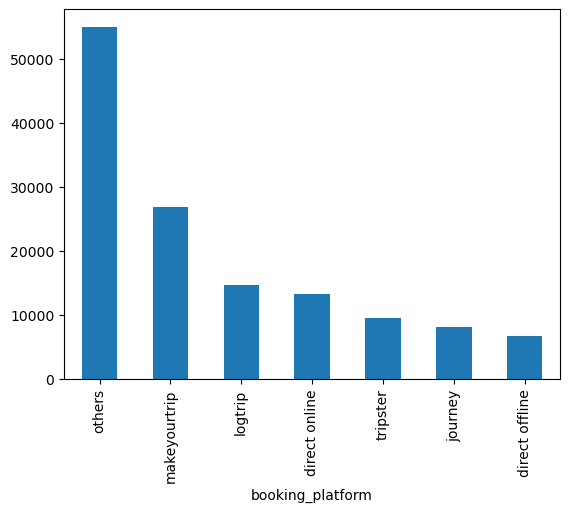

In [8]:
df_booking.booking_platform.value_counts().plot(kind="bar")

In [9]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


### Read hotels data in dataframe

In [10]:
df_hotels=pd.read_csv("dim_hotels.csv")

In [11]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [15]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

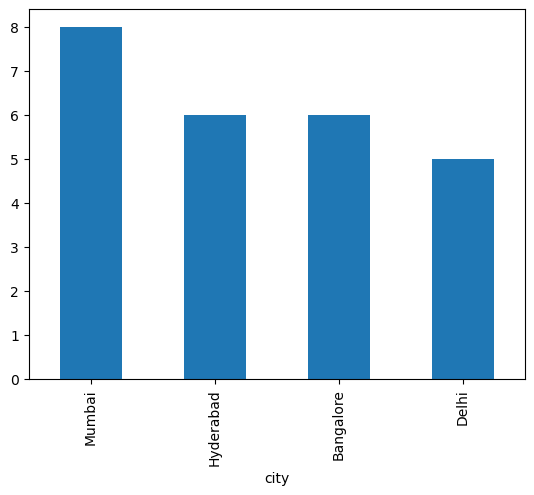

In [16]:
df_hotels.city.value_counts().plot(kind="bar")

### Read aggregate booking in data frame

In [17]:
df_agg_booking = pd.read_csv("fact_aggregated_bookings.csv")

In [18]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


### Explore Aggregate booking data

In [19]:
df_agg_booking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [20]:
df_agg_booking.shape

(9200, 5)

In [21]:
# find out unique property ids in aggregate booking data
df_agg_booking.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [22]:
# find out total booking for a property id in aggregate booking data
df_agg_booking.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [23]:
# find out days when bookings are greater than capacity
df_agg_booking[df_agg_booking.successful_bookings>df_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [24]:
# find out properties that have highest capacity
df_agg_booking.capacity.max()

50

In [25]:
df_agg_booking[df_agg_booking.capacity == df_agg_booking.capacity.max()]


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


#### Read rest of all the files

In [26]:
df_date = pd.read_csv('dim_date.csv')
df_rooms = pd.read_csv('dim_rooms.csv')


### 2.Data Cleaning

In [27]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


#### 1)Clean invalid guest

In [28]:
df_booking[df_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [29]:
df_booking=df_booking[df_booking.no_guests>0]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [30]:
df_booking.shape

(134590, 12)

#### 2)Out lier removal in revenue_generated

In [31]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(6500, 45220)

In [32]:
df_booking.revenue_generated.mean() , df_booking.revenue_generated.median()

(np.float64(14916.013188201203), 13500.0)

In [33]:
avg , std = df_booking.revenue_generated.mean() , df_booking.revenue_generated.std()

In [34]:
higher_limit = avg+3*std

In [35]:
higher_limit

np.float64(34274.617403506796)

In [36]:
lower_limit = avg -3*std
lower_limit

np.float64(-4442.59102710439)

In [37]:
df_booking[df_booking.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [38]:
df_booking[df_booking.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [39]:
df_booking=df_booking[df_booking.revenue_generated<=higher_limit]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [40]:
df_booking.revenue_realized.describe()

count    133070.000000
mean      12468.775464
std        6537.748605
min        2600.000000
25%        7600.000000
50%       11400.000000
75%       15300.000000
max       34200.000000
Name: revenue_realized, dtype: float64

In [41]:
higher_limit_rev_rea=df_booking.revenue_realized.mean() + 3* df_booking.revenue_realized. std()
higher_limit_rev_rea

np.float64(32082.021279982062)

In [42]:
df_booking[df_booking.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [43]:
df_booking[df_booking.room_category=="RT4"].revenue_realized.describe()

count    14553.000000
mean     22483.440390
std       8338.248282
min       7600.000000
25%      19000.000000
50%      22800.000000
75%      31350.000000
max      34200.000000
Name: revenue_realized, dtype: float64

In [44]:
# mean + 3* std
22483 +3*8338

47497

In [46]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77054
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [50]:
#In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the 
#appropriate subtitute (possible ways is to use mean or median)

In [54]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [55]:
df_agg_booking[df_agg_booking.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [57]:
df_agg_booking.capacity.median()

25.0

In [59]:
df_agg_booking.capacity.fillna(df_agg_booking.capacity.median(),inplace = True)

C:\Users\Pavan\AppData\Local\Temp\ipykernel_15976\3848777659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_booking.capacity.fillna(df_agg_booking.capacity.median(),inplace = True)


In [65]:
# In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those record
df_agg_booking[df_agg_booking.successful_bookings.sum()>df_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [64]:
df_agg_booking.shape

(9200, 5)

In [66]:
df_agg_booking = df_agg_booking[df_agg_booking.successful_bookings<=df_agg_booking.capacity]
df_agg_booking.shape

(9200, 5)

### Data Transformation


In [104]:
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


#### Create occupancy percentage column

In [105]:
df_agg_booking["occ_pct"] = df_agg_booking["successful_bookings"]/df_agg_booking["capacity"]
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,0.833333
1,19562,01-May-22,RT1,28,30,0.933333
2,19563,01-May-22,RT1,23,30,0.766667
3,17558,01-May-22,RT1,13,19,0.684211
4,16558,01-May-22,RT1,18,19,0.947368


#### Converting it to percentage value

In [108]:
df_agg_booking["occ_pct"] = df_agg_booking["occ_pct"].apply(lambda x: round(x*100, 2))
df_agg_booking.head(5) 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74


In [109]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [110]:
df_agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   int64  
 5   occ_pct              9200 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 431.4+ KB


  There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

 1. Creating new columns
 1. Normalization
 1. Merging data
 1. Aggregation

### 4 Insights Generation

#### 1) What is an average occupancy rate in each of the room categories?

In [113]:
df_agg_booking.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.919022
RT2    58.007948
RT3    58.028213
RT4    59.278722
Name: occ_pct, dtype: float64

In [114]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [117]:
df = pd.merge(df_agg_booking, df_rooms, left_on = "room_category", right_on = "room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard


In [119]:
df.drop('room_id', axis=1 ,inplace=True)

In [120]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.007948
Premium         58.028213
Presidential    59.278722
Standard        57.919022
Name: occ_pct, dtype: float64

In [121]:
df[df.room_class=="Standard"].occ_pct.mean()

np.float64(57.919021739130436)

#### 2)Print average occupancy rate per city

In [122]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [123]:
df = pd.merge(df, df_hotels, on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi


In [124]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.341046
Delhi        61.521630
Hyderabad    58.122006
Mumbai       57.915679
Name: occ_pct, dtype: float64

#### 3) When was the occupancy better? Weekday or Weekend?

In [125]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [126]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore,01-May-22,May 22,W 19,weekend
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi,01-May-22,May 22,W 19,weekend


In [127]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

#### 4)In the month of June, what is the occupancy for different cities

In [128]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,18560,01-Jun-22,RT1,18,30,60.00,Standard,Atliq City,Business,Hyderabad,01-Jun-22,Jun 22,W 23,weekeday
3102,19562,01-Jun-22,RT1,18,30,60.00,Standard,Atliq Bay,Luxury,Bangalore,01-Jun-22,Jun 22,W 23,weekeday
3103,19563,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Palace,Business,Bangalore,01-Jun-22,Jun 22,W 23,weekeday
3104,17558,01-Jun-22,RT1,8,19,42.11,Standard,Atliq Grands,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday


In [129]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

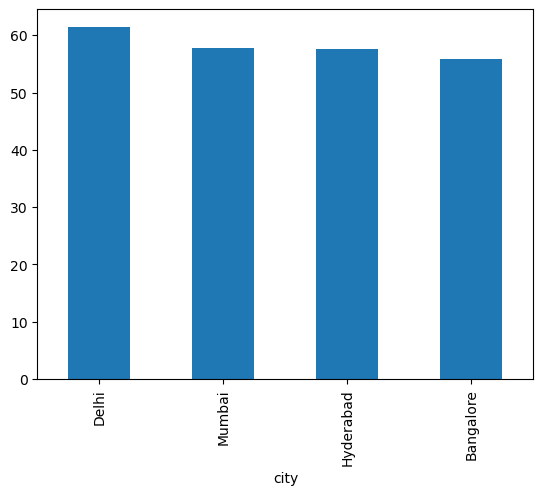

In [130]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

#### 5) We got new data for the month of august. Append that to existing data

In [131]:
df_august=pd.read_csv('new_data_august.csv')

In [132]:
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [133]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [134]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [135]:
df_august.shape

(7, 13)

In [137]:
df.shape

(9200, 14)

In [138]:
latest_df = pd.concat([df, df_august],ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9197,17558,31-Jul-22,RT4,3,6,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
9198,19563,31-Jul-22,RT4,3,6,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
9199,17561,31-Jul-22,RT4,3,4,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
9200,16559,01-Aug-22,RT1,30,30,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
9201,19562,01-Aug-22,RT1,21,30,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
9202,19563,01-Aug-22,RT1,23,30,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
9203,19558,01-Aug-22,RT1,30,40,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
9204,19560,01-Aug-22,RT1,20,26,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
9205,17561,01-Aug-22,RT1,18,26,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
9206,17564,01-Aug-22,RT1,10,16,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [139]:
latest_df.shape

(9207, 15)

#### 6) Print revenue realized per city

In [141]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [142]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [146]:
df_booking_all = pd.merge(df_booking, df_hotels, on="property_id")
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [147]:
df_booking_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    415122840
Delhi        289472918
Hyderabad    325232870
Mumbai       629391323
Name: revenue_realized, dtype: int64

#### 7) Print month by month revenue

In [148]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [149]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [151]:
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [152]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [153]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_15976\1849468159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [154]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133070 entries, 0 to 133069
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133070 non-null  object 
 1   property_id        133070 non-null  int64  
 2   booking_date       133070 non-null  object 
 3   check_in_date      133070 non-null  object 
 4   checkout_date      133070 non-null  object 
 5   no_guests          133070 non-null  int64  
 6   room_category      133070 non-null  object 
 7   booking_platform   133070 non-null  object 
 8   ratings_given      56016 non-null   float64
 9   booking_status     133070 non-null  object 
 10  revenue_generated  133070 non-null  int64  
 11  revenue_realized   133070 non-null  int64  
 12  property_name      133070 non-null  object 
 13  category           133070 non-null  object 
 14  city               133070 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [156]:
df_booking_all["check_in_date"] = pd.to_datetime(df_booking_all["check_in_date"])
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [158]:
df_booking_all = pd.merge(df_booking_all, df_date, left_on="check_in_date", right_on="date")
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [159]:
df_booking_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    556460174
Jun 22    537219271
May 22    565540506
Name: revenue_realized, dtype: int64

In [160]:
#Print revenue realized per hotel type
df_booking_all.groupby("property_name")["revenue_realized"].sum().sort_values(ascending = False)

property_name
Atliq Exotica    302862944
Atliq Palace     294193161
Atliq City       279554213
Atliq Blu        256643260
Atliq Bay        255735290
Atliq Grands     207800708
Atliq Seasons     62430375
Name: revenue_realized, dtype: int64

In [161]:
#Print average rating per city
df_booking_all.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending = False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

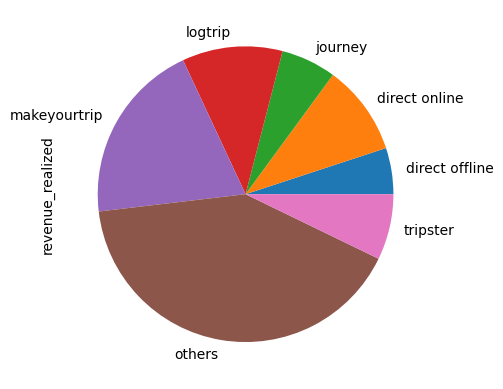

In [162]:
#Print a pie chart of revenue realized per booking platform

df_booking_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind = "pie")
plt.xticks(rotation = 0)
plt.show()